In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\87269\AppData\Local\Temp\ipykernel_29880\2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [5]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [6]:
df.shape

(7461195, 13)

In [7]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

## Clean up data

In [8]:
# only want USA races, 50k or 50 miles, 2020
df2 = df[(df["Event distance/length"].isin(["50km", "50mi"])) & (df["Year of event"] == 2020) & (df["Event name"].str.contains(r"\(USA\)", regex=True))]

In [9]:
df2.shape

(26524, 13)

In [10]:
# remove USA from event name
df2["Event name"] = df2["Event name"].str.replace("\(USA\)", "")

C:\Users\87269\AppData\Local\Temp\ipykernel_29880\787361520.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["Event name"] = df2["Event name"].str.replace("\(USA\)", "")
C:\Users\87269\AppData\Local\Temp\ipykernel_29880\787361520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Event name"] = df2["Event name"].str.replace("\(USA\)", "")


In [11]:
df2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [12]:
# clean up athlete age
df2["athlete_age"] = 2020 - df2["Athlete year of birth"]

C:\Users\87269\AppData\Local\Temp\ipykernel_29880\1861140254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["athlete_age"] = 2020 - df2["Athlete year of birth"]


In [13]:
# remove h from performce
df2["Athlete performance"] = df2["Athlete performance"].str.split(" ").str.get(0)

C:\Users\87269\AppData\Local\Temp\ipykernel_29880\591196922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Athlete performance"] = df2["Athlete performance"].str.split(" ").str.get(0)


In [14]:
df2.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [15]:
# drop columns: Athlete Club, Athlete Country, athlete year of birth, athlete age category
df2 = df2.drop(["Athlete club", "Athlete country", "Athlete year of birth", "Athlete age category"], axis = 1)

In [16]:
# remove null values
df2.isna().sum()
# nas in athelete_age
df2 = df2.dropna()

In [17]:
df2.shape

(26289, 10)

In [18]:
# check for duplicates
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [19]:
# reset index
df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
26284,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
26285,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
26286,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
26287,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [20]:
# fix types
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [21]:
df2["athlete_age"] = df2["athlete_age"].astype(int)

In [22]:
df2.dtypes

Year of event                 int64
Event dates                  object
Event name                   object
Event distance/length        object
Event number of finishers     int64
Athlete performance          object
Athlete gender               object
Athlete average speed        object
Athlete ID                    int64
athlete_age                   int32
dtype: object

In [23]:
# rename columns
# Year of event                 int64
# Event dates                  object
# Event name                   object
# Event distance/length        object
# Event number of finishers     int64
# Athlete performance          object
# Athlete gender               object
# Athlete average speed        object
# Athlete ID                    int64
# athlete_age                   int32

In [24]:
df2 = df2.rename(columns = {'Year of event': 'year',
                            'Event dates': 'race_day',
                            'Event name': 'race_name',
                            'Event distance/length': 'race_length',
                            'Event number of finishers':'race_number_of_finishers',
                            'Athlete performance':'athlete_performance',
                            'Athlete gender':'athlete_gender', 
                            'Athlete average speed':'athlete_average_speed',
                            'Athlete ID':'athlete_id'
})

In [25]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [26]:
# reorder columns
df3 = df2[["race_day", "race_name", "race_length", "race_number_of_finishers", "athlete_id", "athlete_gender", "athlete_age", "athlete_performance", "athlete_average_speed", "year"]]

In [27]:
df3

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020
...,...,...,...,...,...,...,...,...,...,...
2760957,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,816361,F,62,7:07:48,7.013,2020
2760958,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,326469,F,43,7:27:22,6.706,2020
2760959,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,372174,F,58,7:27:24,6.705,2020
2760960,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,860349,F,39,7:38:30,6.543,2020


## Visualisation

<AxesSubplot:xlabel='race_length', ylabel='Count'>

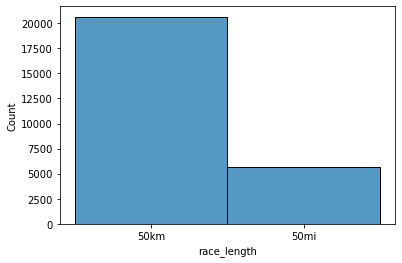

In [28]:
sns.histplot(df3["race_length"])

<AxesSubplot:xlabel='race_length', ylabel='Count'>

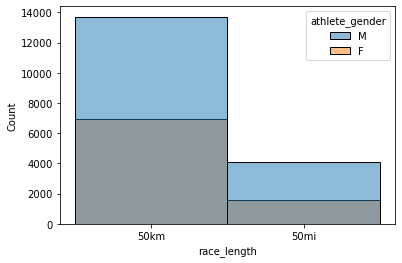

In [29]:
sns.histplot(df3, x = "race_length", hue = "athlete_gender")

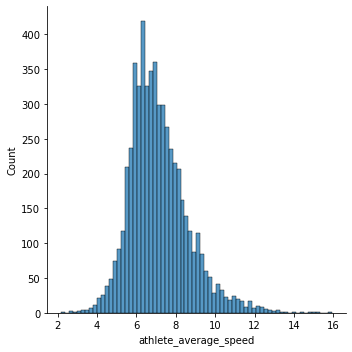

In [30]:
df3.athlete_average_speed = df3.athlete_average_speed.astype(float)
sns.displot(df3[df3['race_length'] == '50mi']['athlete_average_speed'])

In [31]:
df3.dtypes

race_day                     object
race_name                    object
race_length                  object
race_number_of_finishers      int64
athlete_id                    int64
athlete_gender               object
athlete_age                   int32
athlete_performance          object
athlete_average_speed       float64
year                          int64
dtype: object

<AxesSubplot:xlabel='race_length', ylabel='athlete_average_speed'>

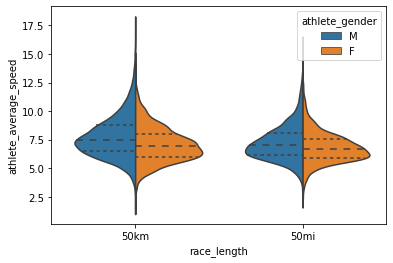

In [32]:
sns.violinplot(data = df3, x = 'race_length', y = 'athlete_average_speed', hue = 'athlete_gender', split = True, inner = 'quart', liner = 1)

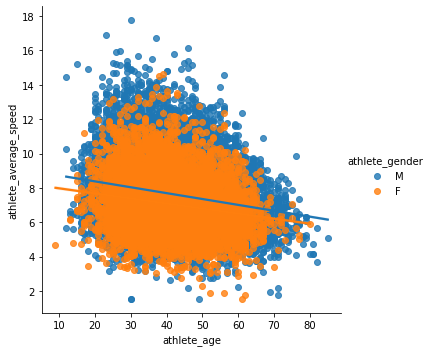

In [33]:
sns.lmplot(data = df3, x = 'athlete_age', y = 'athlete_average_speed', hue = 'athlete_gender')

In [34]:
# questions I want to find out from the data

In [35]:
# difference in speed for the 50k, 50mmi male to female

In [36]:
df3.groupby(["race_length", "athlete_gender"])["athlete_average_speed"].mean()

race_length  athlete_gender
50km         F                 7.092015
             M                 7.743376
50mi         F                 6.830764
             M                 7.249766
Name: athlete_average_speed, dtype: float64

In [37]:
# what age groups are the best in the 50mi race（at least 20 counts)
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = False).query('count > 19')

,mean,count
athlete_age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [38]:
# seasons for the data -> slower in summer than winter?

In [39]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [40]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x>11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring')

In [41]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,year,race_month,race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020,2,Spring
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020,2,Spring
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020,2,Spring
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020,2,Spring
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020,2,Spring


In [42]:
df3.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.079955,2459
Winter,6.903617,358
Summer,6.486055,843
